# Lab 3 : Classification




### Summary of the lab session : 


#### I) Basic application of classification models on toy dataset : 
    - Logistic Regression
    - LDA
    - SVM
    - Kernels

    
#### II) Marketing project : 
    - Presentation of pandas
    - Feature engineering 
    - Models 

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

Please put **"ML - MSc - TD3"** in the mail subject or I might lose your work (which means 0) and send it to pierre.houdouin@centralesupelec.fr

Please label your notebook **"L3_familyname1_familyname2.ipynb"** or I might lose your work (which means 0).

We begin with the standard imports:

In [1]:
# Import the packages
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

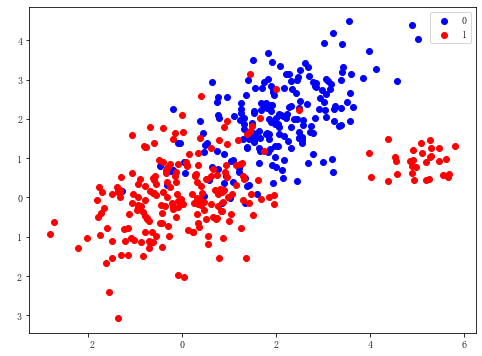

In [2]:
# Import the data 
plt.figure(figsize=(8,6))
data = np.loadtxt('NLS_2.csv',delimiter=",")
X = data[:,:2]
y = data[:,2]

color = ['b','r']
labels = ['0','1']
for i in range(len(color)) : 
    idx=np.where(data[:,2]==i)
    plt.scatter(data[idx,0],data[idx,1], c=color[i], marker='o',label=labels[i])
plt.legend()

### Recap Classification : 
Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping/decision function $(\hat{f})$ from input variables ($X$) to discrete output variables $(y)$.

In a data-science project the common practice is to split randomly your data between three datasets :

- a train dataset for fitting the paramaters of the models
- a test data set to compute the test-error on unseen data and deduce the hyperparameters (like regularisation value C) which minimise the test error 
- finally a generalisation dataset to evaluate the final error of the models i.e the error on unseen data with a tuned model. 

#### => In this Lab session we are going to use only 2 datasets : a train dataset for fitting the parameters and a test-generalisation dataset for finding the best parameters and evaluate the generalisation error.


A more advanced advanced way to split the data is the use of the cross validation, you will see this later normally.


### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression - Recap :

The idea is to put a probabilistic model on the Random Variable $Y \text{ (label) }$ given  $ X(\text{features)}$ for an observed data. We suppose that : 
$$ P(Y=1|X=x)=\frac{1}{1+e^{-\langle X,\beta \rangle}}=\frac{1}{1+e^{-(X^1\beta_1 +...X^p\beta_p )}}$$
So the goal of the fitting part is to find the vector $\beta$ maximising the likelihood of the train dataset

### Question : Write the log-likelihood for the train dataset i.e $((x_1,y_1),...(x_n,y_n))$ :

Answer : $\mathcal{L}(Y;\beta,X)= log(\prod (p(x_{i})^{y_{i}} \times (1-p(x_{i}))^{(1-y_{i})})) \\
                        = \sum_{i=1}^{n} y_{i} log(p(x_{i})) + (1-y_{i})log(1-p(x{i})) \\
                        = \sum_{i=1}^{n} y_{i} log(\frac{1}{1+e^{-\beta x_{i}}}) + (1-y_{i})log(\frac{e^{-\beta x_{i}}}{1+e^{-\beta x_{i}}}) \\
                        = \sum_{i=1}^{n} y_{i} \beta \ x_{i} - \log_{}({1+ \exp(\beta\ x_{i}}))$

### After the training, $\beta$ is set. How does the model assign the labels for the test dataset i.e $((x'_1,y_1),...(x'_k,y'_k))$

Answer : $\hat{k}  = \underset{k}{\arg\max}Pr(G=k|X=x)$

### Task : Fit a Logistic Regression model on the train dataset with arbitrary regularisation
use : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
#Todo
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


Now it's time to evaluate the performances of our model. There are plenty of metrics for classification problem, we will work with two non neglible metrics.
$$ \text{Accuracy} = \frac{\text{Number of right classifications}}{\text{Number of classifications}} $$


$$Auc = P(\hat{f(X)} >\hat{f(X')}|Y=1 , Y'=0) $$

Given a randomly chosen observation $X$ belonging to class 1, and a randomly chosen observation $X'$ belonging to class 0, the AUC is the probability that the evaluated classification algorithm will assign a higher score to X than to X'. For instance the score of our Logisitic model is $P(Y=1|X=x)$


PS : The AUC could be considered as the most important metric in a classification problem, because it's insentitive to unbalanced dataset.

### TASK : Print the Accuracy and the AUC of our model on the test dataset
use : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

In [5]:
#TODO
# Based on the result, we can see that the value of accuracy and AUC is very close and relative high.
acc = accuracy_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
print("Accuracy = {:.3}".format(acc))
print("AUC = {:.3}".format(auc))

Accuracy = 0.782
AUC = 0.78


We need to tune the hyperparameters especially the regularisation parameter (C).

### Task : Fill error_c_Logistic.
For a list of predefined C values, the function plot_error_c_Logistic will fit a model and compute the error for each value of C in order to select the parameters with the highest accuracy or AUC. 
Return the best C and plot the test accuracy with respect to C, with a L2 regularisation. Try with different C beetwen 0.01 and 1

We can use np.linspace(0.01,1,n) to divide equally [0.01,1] 

In [8]:
#Todo 
def error_c_Logistic(X_train,X_test,y_train,y_test):
    C = np.linspace(0.01,1,20)
    acc = []
    auc = []
    for c in C:
        clf = LogisticRegression(random_state=0, C=c).fit(X_train, y_train)
        acc.append(accuracy_score(y_test, clf.predict(X_test)))
        auc.append(roc_auc_score(y_test, clf.predict(X_test)))
    plt.figure(figsize=(10,8))
    plt.plot(C, acc, c='green')
    plt.plot(C, auc, c='blue')
    plt.xlabel('Value of C')
    plt.legend(['Accuracy', 'AUC'])
    plt.grid()
    
    # Return the value C with the highest accuracy:
    index = acc.index(max(acc))
    return C[index]

0.2705263157894737

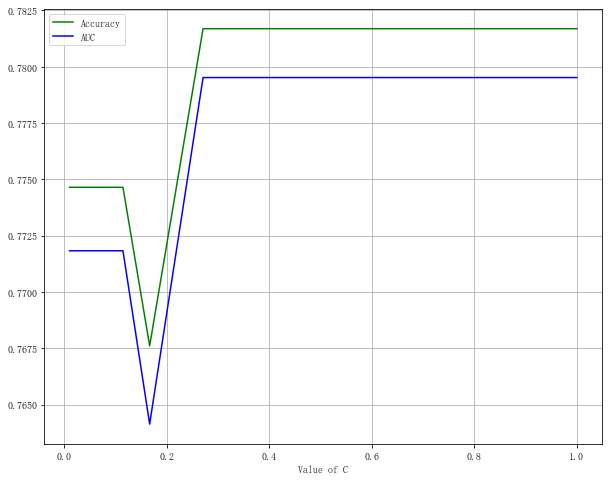

In [9]:
# Based on the result below, we find that when C is higher than 0.27, the logistic regression has a highest accuracy
# At the same time, auc reaches at the highest value as well. And both accuracy and AUC remain stable afterwards.
error_c_Logistic(X_train,X_test,y_train,y_test)

### Task : Train a model with the best value of C and return the AUC and the accuracy

In [10]:
#TODO
clf = LogisticRegression(random_state=0, C=0.271).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
print("Accuracy = {:.3}".format(acc))
print("AUC = {:.3}".format(auc))

Accuracy = 0.782
AUC = 0.78


# LDA 

As the Logistic Regression, LDA puts a probalistic model on the data. This time $P(Y)$ and $P(X |Y)$ are modelized. It assumes that X are sampled from a K gaussian mixture with K the number of classes.
$$P(Y=k) = \frac{\text{Number of train samples labeled K}}{\text{Number of train sample}}$$

$$P(X=x |Y=k) = \mathcal{N}(x,\mu_k,\Sigma_k) $$



### Question :  How does the model assign the labels for the test dataset 

Answer : $\hat{C}(x) =  \underset{k}{\arg\max}  \ x^{T} \sum_{k}\ ^ {-1} \mu_{k} \ -\ \frac{1}{2} \mu^T_{k}\sum_{k}\ ^ {-1} \mu_{k}\ -\ \frac{1}{2}x^T\sum_{k}\ ^ {-1}x\ +\ log(\pi_{k})$

### Task : Fit a LDA model on the train dataset and returns the test metrics

In [11]:
#TODO
lda = LDA().fit(X_train, y_train)
y_predict_lda = lda.predict(X_test)

acc = accuracy_score(y_test, y_predict_lda)
auc = roc_auc_score(y_test, y_predict_lda)
print("Accuracy = {:.3}".format(acc))
print("AUC = {:.3}".format(auc))

# From this result, we notice that LDA classification has similar performance in accuracy and AUC as Logistic regression

Accuracy = 0.782
AUC = 0.78


# SVM
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. 

### Question Bonus : Suppose that the labels $\in \{1,-1\}$. Write the Loss fonction $\mathcal{L}(y,x;\theta)$ of the SVM for a train dataset ((x_1,y_1),...(x_n,y_n)). Then compare to the Logistic Regression with Ridge regularization and comment. 

### Answer :  
Loss function of SVM considering slack variables is :

$\mathcal{L}(y, x;\theta) =\min \frac{1}{2} ||\theta || ^2 + C\sum_{i=1}^{n} \zeta_{i}  \ \ s.t.y_{i}(w^{T}x_{i}+b)\ge 1-\zeta_{i}, \ \zeta_{i}> 0\  \forall i $ 

Loss function of logistic regression with Ridge regularization is :

$\mathcal{L}(Y;\beta,X) = \sum_{i=1}^{n} y_{i} \beta \ x_{i} - \log_{}({1+ \exp(\beta\ x_{i}})) + \lambda \frac{1}{2}||\beta||^2 $

Comments:
Both SVM and Logistic regression has regularization parameter (C / alpha), controlling the bias-variance trade-off. According to the formulas of loss function above, SVM focuses on margin maximization, while logistic regression focuses on maximization of product of probablities. Both algorithms add a penality function to improve modelling performance in order to avoid overfitting. More precisely, SVM penalizes the data which have larger values of $\zeta$, because we want to find the optimal boudary from which as many data points as possible are far. While logistic regression penalizes the data with high dimension. 

### Task : Fit a SVM model on the train dataset and return the test metrics
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [13]:
svm_model = svm.SVC(kernel = 'linear').fit(X_train, y_train)
y_predict_svm = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_predict_svm)
auc = roc_auc_score(y_test, y_predict_svm)
print("Accuracy = {:.3}".format(acc))
print("AUC = {:.3}".format(auc))

Accuracy = 0.789
AUC = 0.787


# Kernels

A Kernel function transforms the training data so that a non-linear decision surface is transformed to a linear equation in a higher number of dimensions.
Linear discriminant functions can provide very efficient 2-class classifiers, provided that the class features can be separated by a linear decision surface.

The SVM model from sklearn have kernels already implemented. 
### Task : Try SVM with different kernels to increase the test accuracy

In [14]:
kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    ksvm = svm.SVC(kernel = k).fit(X_train, y_train)
    y_predict_ksvm = ksvm.predict(X_test)

    acc = accuracy_score(y_test, y_predict_ksvm)
    auc = roc_auc_score(y_test, y_predict_ksvm)
    
    print("{}".format(k), " kernel, Accuracy = {:.3}".format(acc))
    print("{}".format(k), " kernel, AUC = {:.3}".format(auc))

linear  kernel, Accuracy = 0.789
linear  kernel, AUC = 0.787
poly  kernel, Accuracy = 0.838
poly  kernel, AUC = 0.842
rbf  kernel, Accuracy = 0.866
rbf  kernel, AUC = 0.868


### Plot decision function

In order to visualize the impact of the kernels, we are going to plot the decision fonction for different models : Logistic Regression, LDA, Vanilla SVM, SVM with polynomial kernel, SVM with RBF kernel.
### Just run the code below

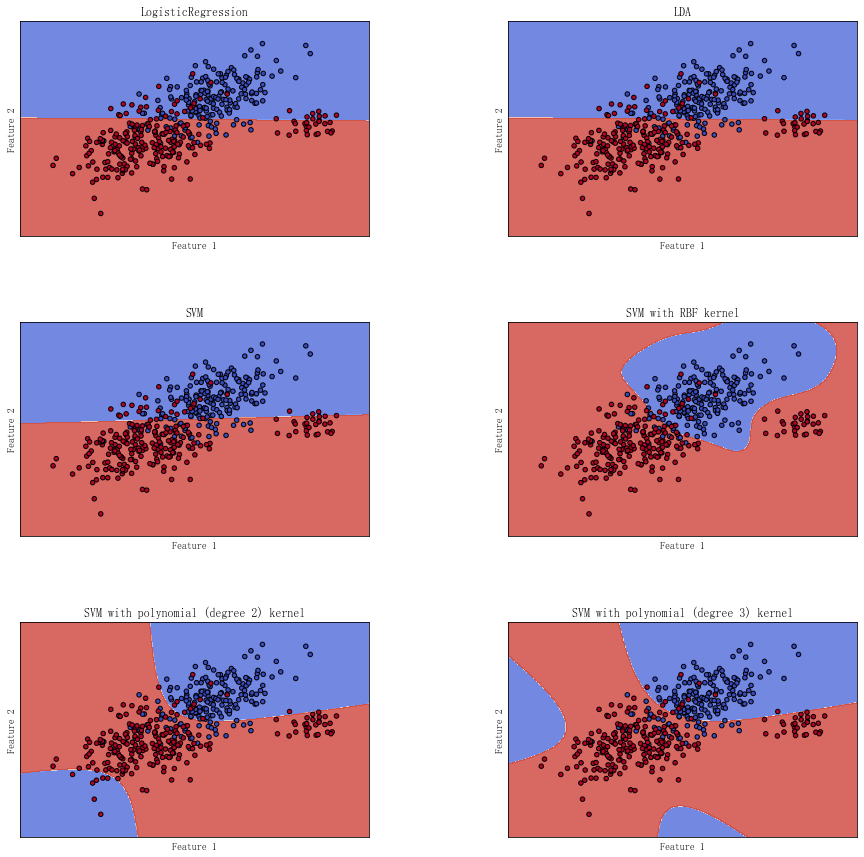

In [15]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




C = 1.0  # SVM regularization parameter

models = (LogisticRegression(C=10),
          LDA(),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)
# title for the plots
titles = ('LogisticRegression',
          'LDA',
          'SVM',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 2) kernel','SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.

fig, sub = plt.subplots(3, 2,figsize=(15,15))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Logistic Regression Kernelized

As it has been done with the SVM function, we are going to improve the logistic regression with a Kernel in order to bring a bit more flexibility to the decision function

### Task : Fill the kernel function below, it must transform your input data in a higher dimensionnal space. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html for a polynomial kernel for instance

In [16]:
class Logit_Kernel():
    # Class for Kernelized Logistic Regression :
    model = None
    C=None
    def __init__(self,C):
        self.C=C
        
    def fit(self, X, y):
        self.model=LogisticRegression(C=self.C)
        self.model.fit(self.kernel(X),y)
        
    def predict(self,X):
        return self.model.predict(self.kernel(X))

    def kernel(self,X):
        #TODO with the kernel of your choice 
        X_0 = PolynomialFeatures(degree =2).fit_transform(X)

        return X_0
    
        


After filling the kernel function just run the following code. It must print the same decision graph as before.
### Just run the code below

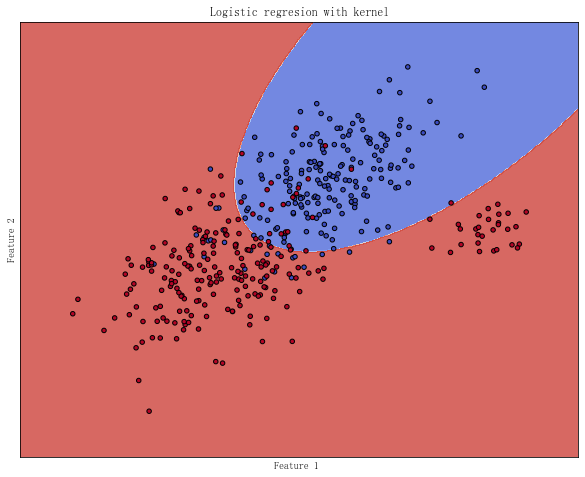

In [17]:
def plot_contours(ax,X,y, **params):
    clf = Logit_Kernel(C=1)
    clf.fit(X,y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



fig, ax = plt.subplots(1,figsize=(10,8))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, X,y,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1 ')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Logistic regresion with kernel')

plt.show()

# Exercice 2 : Classification Project

 Now you are going to apply the methods you've seen on a real-like data science project.
 
 The data is related with direct marketing campaigns of a Portuguese banking institution. 
 The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
 in order to access if the product (bank term deposit) would be (or not) subscribed. 


   The classification goal is to predict if the client will subscribe a term deposit (variable y).
   
## Features - bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
    
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   #other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Pandas library 

In this lab session we put aside the numpy's arrays, we will use the pandas library for the structure of our dataset. Pandas is preferred to numpy in this domain because of its simplicity and it suits wells for data science projects.

Here is a sample of the most useful pandas commands

In [18]:
#Import the dataset
bank = pd.read_csv('bank-full.csv',sep=';')
bank = bank.drop(bank.loc[bank['y']=='no'].sample(25000).index)
bank = bank.sample(10000)
bank = bank.reset_index(drop=True)

### Task : Above each command, tell what it does

In [19]:
# show the first 5 rows of dataframe
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,services,divorced,secondary,no,0,no,no,unknown,20,jun,1023,3,-1,0,unknown,yes
1,64,management,married,tertiary,no,5112,no,no,telephone,19,oct,898,7,137,11,other,yes
2,37,admin.,married,secondary,no,581,yes,yes,cellular,23,jul,203,4,-1,0,unknown,no
3,43,blue-collar,married,primary,no,-111,yes,no,cellular,5,may,75,7,-1,0,unknown,no
4,40,admin.,single,tertiary,no,1248,no,no,unknown,11,jun,1290,2,-1,0,unknown,yes


In [20]:
#  Show the first 5 records of datafrane with only 'job' and 'balance' two columns
bank[['job','balance']].head()

,job,balance
0,services,0
1,management,5112
2,admin.,581
3,blue-collar,-111
4,admin.,1248


In [21]:
# Filter the clients who have credit in default, 
# only show their 'balance' and 'age' information of the previous 5 records  
bank.loc[bank['default']=='yes',['balance','age']].head()

,balance,age
39,0,27
263,-242,30
352,-164,24
369,986,55
385,-1414,24


In [22]:
# Filter the clients who have credit in default, 
# only show their 'balance' and 'age' information of the previous 5 records  
# The result is the same as previous
bank[bank['default']=='yes'][['balance','age']].head()

,balance,age
39,0,27
263,-242,30
352,-164,24
369,986,55
385,-1414,24


In [23]:
# Transform the data in column 'y': yes -> 1, no -> 0
# show the previous 5 records of the new dataframe
bank.loc[bank['y']=='yes','y']=1
bank.loc[bank['y']=='no','y']=0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,services,divorced,secondary,no,0,no,no,unknown,20,jun,1023,3,-1,0,unknown,1
1,64,management,married,tertiary,no,5112,no,no,telephone,19,oct,898,7,137,11,other,1
2,37,admin.,married,secondary,no,581,yes,yes,cellular,23,jul,203,4,-1,0,unknown,0
3,43,blue-collar,married,primary,no,-111,yes,no,cellular,5,may,75,7,-1,0,unknown,0
4,40,admin.,single,tertiary,no,1248,no,no,unknown,11,jun,1290,2,-1,0,unknown,1


In [24]:
# Show the statistical information about the all numerical variables 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.96010,1447.397000,15.745700,303.006000,2.636300,43.765700,0.664200
std,11.02599,3150.481567,8.375383,297.912729,2.890512,102.843415,2.066559
min,18.00000,-3372.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.00000,88.000000,8.000000,114.000000,1.000000,-1.000000,0.000000
50%,39.00000,487.000000,16.000000,206.000000,2.000000,-1.000000,0.000000
75%,48.00000,1575.250000,21.000000,379.250000,3.000000,-1.000000,0.000000
max,95.00000,81204.000000,31.000000,3253.000000,46.000000,782.000000,55.000000


# Feature engineering

Now you've got the minimum vital commands for interacting with your dataset. 
We are going to prepare our data for fitting our models.

As you may have seen, some features are categorical (i.e not real number) and thus cannot be understood by our models. The most common way to fix this is the use of one hot encoding method. For each value of a categorical feature the one encoding create a new feature which will be equal to one or zero depending on the value of the feature for the rows.

For instance the marital status takes its values in \{single,married,divorced\}.
The one hot encoding value of divorced is [0,0,1], it also could be [0,Ø]

use : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Task : Apply the one hot encoding on the dataset.

In [25]:
# Firstly, similarly operations to variable 'default', housing' and 'loan'
bank.loc[bank['housing']=='yes','housing']=1
bank.loc[bank['housing']=='no','housing']=0
bank.loc[bank['loan']=='yes','loan']=1
bank.loc[bank['loan']=='no','loan']=0
bank.loc[bank['default']=='yes','default']=1
bank.loc[bank['default']=='no','default']=0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,services,divorced,secondary,0,0,0,0,unknown,20,jun,1023,3,-1,0,unknown,1
1,64,management,married,tertiary,0,5112,0,0,telephone,19,oct,898,7,137,11,other,1
2,37,admin.,married,secondary,0,581,1,1,cellular,23,jul,203,4,-1,0,unknown,0
3,43,blue-collar,married,primary,0,-111,1,0,cellular,5,may,75,7,-1,0,unknown,0
4,40,admin.,single,tertiary,0,1248,0,0,unknown,11,jun,1290,2,-1,0,unknown,1


In [26]:
# get dummies for all categorical variables
job = pd.get_dummies(bank['job'], prefix='job_')
marital = pd.get_dummies(bank['marital'], prefix='marital_')
education = pd.get_dummies(bank['education'], prefix='education_')
contact = pd.get_dummies(bank['contact'], prefix='contact_')
month = pd.get_dummies(bank['month'], prefix='month')
poutcome = pd.get_dummies(bank['poutcome'], prefix='poutcome')

In [27]:
# Update the bank dataframe: delete the initial concerning columns and add dummy variables:
bank_delete = bank.drop(columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

bank_dummy = pd.concat([bank_delete, job, marital, education, contact, month, poutcome], axis=1)

In [28]:
bank_dummy.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,education__unknown,contact__cellular,contact__telephone,contact__unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,46,0,0,0,0,20,1023,3,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,64,0,5112,0,0,19,898,7,137,11,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,0,581,1,1,23,203,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,43,0,-111,1,0,5,75,7,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,40,0,1248,0,0,11,1290,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


We also have to rescale our numerical data in a same range otherwise some high values features will be overrepresented compared to low value features. (Some models like Ensemble models are insensitive to scale difference) 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

### Task : Rescale the numerical features

In [29]:
bank_dummy.describe()

,age,balance,day,duration,campaign,pdays,previous,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,education__unknown,contact__cellular,contact__telephone,contact__unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.96010,1447.397000,15.745700,303.006000,2.636300,43.765700,0.664200,0.110400,0.198900,0.034200,0.027900,0.212900,0.053400,0.037000,0.087700,0.026100,0.17230,0.032800,0.006400,0.113400,0.589300,0.297300,0.1494,0.495100,0.311100,0.044400,0.681200,0.063900,0.254900,0.070400,0.137300,0.007500,0.061300,0.032100,0.14870,0.117800,0.015100,0.279600,0.087700,0.022300,0.020200,0.106700,0.040900,0.057900,0.794500
std,11.02599,3150.481567,8.375383,297.912729,2.890512,102.843415,2.066559,0.313403,0.399193,0.181752,0.164695,0.409378,0.224841,0.188771,0.282872,0.159441,0.37766,0.178122,0.079748,0.317097,0.491985,0.457093,0.3565,0.500001,0.462967,0.205992,0.466035,0.244587,0.435827,0.255833,0.344181,0.086281,0.239892,0.176274,0.35581,0.322387,0.121957,0.448825,0.282872,0.147665,0.140691,0.308747,0.198068,0.233566,0.404087
min,18.00000,-3372.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,88.000000,8.000000,114.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.00000,487.000000,16.000000,206.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.00000,1575.250000,21.000000,379.250000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.00000,81204.000000,31.000000,3253.000000,46.000000,782.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,

In [30]:
from sklearn.preprocessing import MinMaxScaler

column_headers = list(bank_dummy.columns.values)
scaler = MinMaxScaler().fit(bank_dummy)
bank_scaled = pd.DataFrame(scaler.transform(bank_dummy), columns=column_headers)

In [31]:
bank_scaled.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,education__unknown,contact__cellular,contact__telephone,contact__unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.298183,0.017200,0.056983,0.5229,0.145600,0.491523,0.092589,0.036362,0.057172,0.012076,0.258800,0.110400,0.198900,0.034200,0.027900,0.212900,0.053400,0.037000,0.087700,0.026100,0.17230,0.032800,0.006400,0.113400,0.589300,0.297300,0.1494,0.495100,0.311100,0.044400,0.681200,0.063900,0.254900,0.070400,0.137300,0.007500,0.061300,0.032100,0.14870,0.117800,0.015100,0.279600,0.087700,0.022300,0.020200,0.106700,0.040900,0.057900,0.794500
std,0.143195,0.130023,0.037250,0.4995,0.352722,0.279179,0.091637,0.064234,0.131345,0.037574,0.437997,0.313403,0.399193,0.181752,0.164695,0.409378,0.224841,0.188771,0.282872,0.159441,0.37766,0.178122,0.079748,0.317097,0.491985,0.457093,0.3565,0.500001,0.462967,0.205992,0.466035,0.244587,0.435827,0.255833,0.344181,0.086281,0.239892,0.176274,0.35581,0.322387,0.121957,0.448825,0.282872,0.147665,0.140691,0.308747,0.198068,0.233566,0.404087
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.040910,0.0000,0.000000,0.233333,0.034451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.000000,0.045628,1.0000,0.000000,0.500000,0.062750,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.000000,0.058495,1.0000,0.000000,0.666667,0.116041,0.044444,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [32]:
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """

X = bank_scaled.drop(columns = 'y')
y = bank_scaled['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Classification step

### The goal is to find the best model maximising the AUC score. 
(Here we don't use the accuracy metric because the dataset is a bit unbalanced i.e label 0 are over-represented, and it could skew the accuracy metric, so it's preferable to use AUC which is insensitive to this issue.)



### Task : Try different models and choose the one returning the best AUC



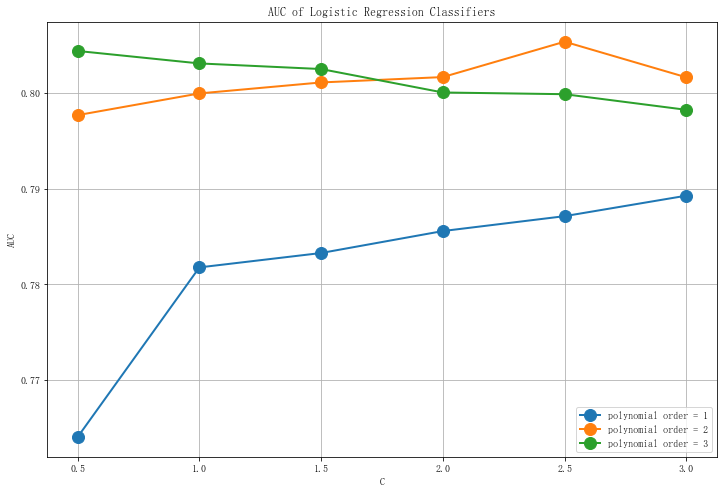

In [33]:
# Define a polynomial kernel class with degree d and regularization parameter C to be defined:
class Logit_Kernel():
    # Class for Kernelized Logistic Regression :
    model = None
    C=None
    def __init__(self,C,d):
        self.C = C
        self.d = d
        
    def fit(self, X, y):
        self.model=LogisticRegression(C=self.C)
        self.model.fit(self.kernel(X),y)
        
    def predict(self,X):
        return self.model.predict(self.kernel(X))

    def kernel(self,X):
        #TODO with the kernel of your choice 
        X_0 = PolynomialFeatures(degree = self.d).fit_transform(X)

        return X_0

# Try logistic regression model :
C = list(np.linspace(0.5, 3, 6))
degree = list(range(1,4,1))
klogist_auc = []

fig,ax = plt.subplots(figsize=(12,8))
for i in range(len(degree)):
    klogist_auc.append([])
    for j in C:
        klogist = Logit_Kernel(C = j, d = degree[i])
        klogist.fit(X_train, y_train)
        auc = roc_auc_score(y_test, klogist.predict(X_test))
        klogist_auc[i].append(auc)

    ax.plot(C, klogist_auc[i], linewidth=2, markersize=12, marker = 'o', label='polynomial order = {}'.format(degree[i]))

ax.set_xlabel('C')
ax.set_ylabel('AUC')
ax.legend()
ax.grid()
plt.title('AUC of Logistic Regression Classifiers')
plt.show()

Based on the previous analysis on Logistic regression model, when d = 1, it means that in a linear regression situation, AUC has lower values comparing with other kernel logistic regression. In terms of the order of polynomial, it shows that when order = 2, the model has better performance.
For all kernerl models, we notice that when C takes higher values, the auc of logistic regression model has higher values. From the value of 2.5, the influence of higher C on AUC gets smaller, even becomes negative. Therefore, when we take c=2.5, polynomial order=2, kernel logistic regression model has best performance with AUC of 0.81.

In [34]:
# Try a LDA classifier :
lda = LDA().fit(X_train, y_train)
auc = roc_auc_score(y_test, lda.predict(X_test))
print("LDA classifer : AUC = {:.3}".format(auc))

LDA classifer : AUC = 0.776


A LDA classifer with all parameters to be default values shows a lower AUC comparing to AUC of previous kernel logistic regression.

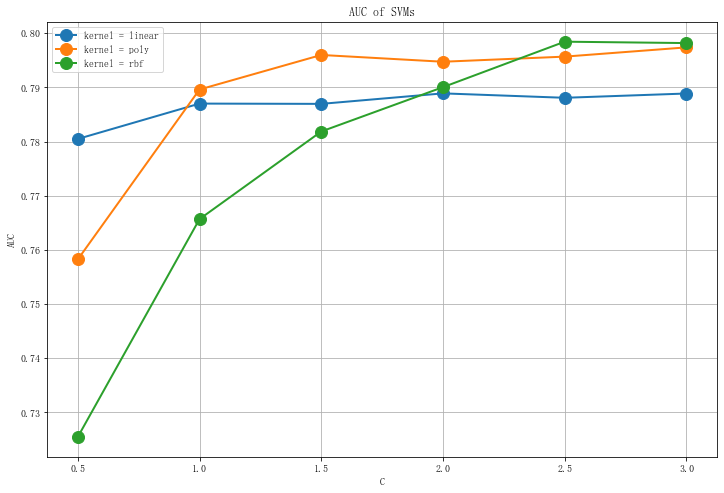

In [35]:
# Try a svm classifier:

C = list(np.linspace(0.5, 3, 6))
kernels = ['linear', 'poly', 'rbf']
ksvm_auc = []

fig,ax = plt.subplots(figsize=(12,8))
for k in range(len(kernels)):
    ksvm_auc.append([])
    for c in C:
        ksvm = svm.SVC(C=c, kernel = kernels[k])
        ksvm.fit(X_train, y_train)
        auc = roc_auc_score(y_test, ksvm.predict(X_test))
        ksvm_auc[k].append(auc)

    ax.plot(C, ksvm_auc[k], linewidth=2, markersize=12, marker = 'o', label='kernel = {}'.format(kernels[k]))

ax.set_xlabel('C')
ax.set_ylabel('AUC')
ax.legend()
ax.grid()
plt.title('AUC of SVMs')
plt.show();

From the results above, we can see that for all kernel functions, as regularization parameter C increases from 0.5 to 2.0, AUC increases largely, when C surpasses 2.0, the increase of AUC becomes slower. It indicates that regularization significantly improves the classification performance. In addition, as for three kernel functions, it seems that the overall performance of rbf kernel function is best. Therefore, the best performance of svm based on the analysis above is from the model with rbf kernel function and a regularization parameter of 2.5, since as C increases further, the performance will not get much better.

Based on the all attemps above, the highest AUC happens in kernel logistic regression, when regularization parameter takes 2.5 and polynomial order takes 2, auc has a value of 0.81